In [21]:
import pandas as pd
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [22]:
data = pd.read_csv("../Data/heart.csv")
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [23]:
data.shape

(303, 14)

# Основанный на L1 метод

In [36]:
x, y = data.iloc[:, :-1], data.iloc[:, -1]
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
model = SelectFromModel(lsvc, prefit=True)
x_new = model.transform(x)
"ориг", data.shape, "выбранные", x_new.shape

/Users/voodo/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


('ориг', (303, 14), 'выбранные', (303, 7))

# Критерий Фишера (F-тест)

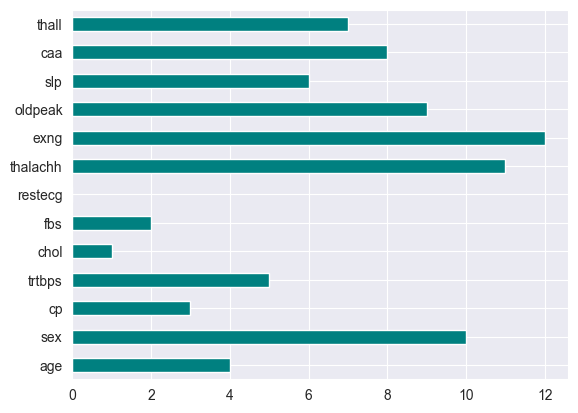

In [43]:
import pandas as pd
import numpy as np
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

# Вычисляем критерий
# Где X, y - входные и выходные данные соответственно.
ranks = fisher_score.fisher_score(np.array(x), np.array(y))

# Делаем график наших "фич"
# Где data - ваш датасет
feature_importances = pd.Series(ranks, data.columns[0:len(data.columns)-1])
feature_importances.plot(kind='barh', color='teal')
plt.show()

# Вывод

Произведена выборка критериев при помощи 2-х методов